# Udacity's Data Scientist Nanodegree

## Introduction to Data Science

## Project: Write a Data Science Blog Post

---

The data explored in the present notebook contains detailed information provided by guests about listings and its calendar details for the city of Santiago, Chile, compiled on March 2019. The data was obtained from [Inside AirBnB](http://insideairbnb.com/get-the-data.html).

The Cross-Industry Standard Process for Data Mining (CRISP-DM) will be used to explore the data. The CRISP-DM process encompasses six elements:

   1. [Business Understanding](#business)
   2. [Data Understanding](#data_u)
   3. [Data Preparation](#data_p)
   4. [Modeling](#modeling)
   5. [Evaluation](#evaluation)
   6. Deploy

This project is a requirement for Udacity's Data Scientist Nanodegree.

<a id='business'></a>
### 1. Business Understanding

Data will be analyzed in order to answer four questions:

    1. Which are the neighborhoods with the most listings?
    2. Which neighborhood is the most expensive and which is the cheapest?
    3. What type of properties are more frequently listed?
    4. How does pricing fluctuate in a monthly basis?
    5. Can we predict the rating of property using a model?

<a id='data_u'></a>
### 2. Data Understanding

In [71]:
# Import libraries
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [72]:
# Load datasets
df_listings = pd.read_csv('data/listings.csv')
df_calendar = pd.read_csv("data/calendar.csv")

/Users/nicovillena/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2.1 Listings Data

In [73]:
# Check df_listing
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14576,https://www.airbnb.com/rooms/14576,20190315153816,2019-03-15,Dp Valen Castillo 1600,NaN,Nice Flat in 11th floor in front of Mountains ...,Nice Flat in 11th floor in front of Mountains ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,NaN
1,34552,https://www.airbnb.com/rooms/34552,20190315153816,2019-03-15,Big nd nice room + private bathroom,NaN,Big and nice room with private bathroom in a b...,Big and nice room with private bathroom in a b...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN


In [74]:
# Check dimensions
df_listings.shape

(15790, 106)

In [75]:
# Check columns, type and null values
df_listings.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15790 entries, 0 to 15789
Data columns (total 106 columns):
id                                              15790 non-null int64
listing_url                                     15790 non-null object
scrape_id                                       15790 non-null int64
last_scraped                                    15790 non-null object
name                                            15776 non-null object
summary                                         14916 non-null object
space                                           9156 non-null object
description                                     15244 non-null object
experiences_offered                             15790 non-null object
neighborhood_overview                           8598 non-null object
notes                                           4579 non-null object
transit                                         8247 non-null object
access                                          7648 non

In [76]:
# Check descriptive statistics
df_listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.579000e+04,1.579000e+04,0.0,0.0,0.0,1.579000e+04,0.0,15785.000000,15785.000000,0.0,...,8522.000000,8523.000000,8520.000000,8520.000000,0.0,15790.000000,15790.000000,15790.000000,15790.000000,8880.000000
mean,2.029103e+07,2.019032e+13,NaN,NaN,NaN,1.010210e+08,NaN,8.492936,8.492936,NaN,...,9.686107,9.626188,9.678169,9.367254,NaN,7.512730,6.693414,0.755921,0.063395,1.219730
std,8.973118e+06,0.000000e+00,NaN,NaN,NaN,7.397464e+07,NaN,29.237780,29.237780,NaN,...,1.022877,1.103377,0.881761,1.160238,NaN,26.243083,26.334092,1.345768,0.406386,1.435516
min,1.457600e+04,2.019032e+13,NaN,NaN,NaN,1.497200e+04,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.394380e+07,2.019032e+13,NaN,NaN,NaN,3.406948e+07,NaN,1.000000,1.000000,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.220000
50%,2.187472e+07,2.019032e+13,NaN,NaN,NaN,9.188949e+07,NaN,1.000000,1.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.660000
75%,2.809557e+07,2.019032e+13,NaN,NaN,NaN,1.626912e+08,NaN,3.000000,3.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,1.752500
max,3.307846e+07,2.019032e+13,NaN,NaN,NaN,2.489227e+08,NaN,266.000000,266.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,201.000000,201.000000,16.000000,7.000000,11.700000


In [77]:
# Columns without missing values
df_listings.columns[df_listings.isnull().mean() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'experiences_offered',
       'picture_url', 'host_id', 'host_url', 'host_verifications', 'street',
       'neighbourhood_cleansed', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'requires_license',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_ve

In [78]:
# Columns with 75% o more missing values
df_listings.columns[df_listings.isnull().mean() > .75]

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed',
       'zipcode', 'square_feet', 'weekly_price', 'monthly_price', 'license',
       'jurisdiction_names'],
      dtype='object')

#### 2.2 Calendar Data

In [79]:
df_calendar.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5469129,2019-03-15,t,"$20,107.00","$20,107.00",1.0,1125.0
1,5469129,2019-03-16,t,"$20,107.00","$20,107.00",1.0,1125.0


In [80]:
# Check dimensions
df_calendar.shape

(5759009, 7)

In [81]:
# Check columns, type and null values
df_calendar.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5759009 entries, 0 to 5759008
Data columns (total 7 columns):
listing_id        5759009 non-null int64
date              5759009 non-null object
available         5759009 non-null object
price             5758828 non-null object
adjusted_price    5758828 non-null object
minimum_nights    5755385 non-null float64
maximum_nights    5755385 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 307.6+ MB


In [82]:
# Check descriptive statistics
df_calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,5.759009e+06,5.755385e+06,5.755385e+06
mean,2.029285e+07,5.080170e+00,1.750447e+05
std,8.971904e+06,2.951039e+01,1.732188e+07
min,1.457600e+04,1.000000e+00,1.000000e+00
25%,1.394409e+07,1.000000e+00,3.100000e+01
50%,2.187667e+07,2.000000e+00,1.125000e+03
75%,2.809445e+07,3.000000e+00,1.125000e+03
max,3.307846e+07,1.100000e+03,2.147484e+09


In [83]:
# Columns without missing values
df_calendar.columns[df_calendar.isnull().mean() == 0]

Index(['listing_id', 'date', 'available'], dtype='object')

In [84]:
# Columns with 75% o more missing values
df_calendar.columns[df_calendar.isnull().mean() > .75]

Index([], dtype='object')

<a id='data_p'></a>
### 3. Data Preparation

#### 3.1 Listings Data

In [85]:
# Drop null score values
df_listings.dropna(subset = ['review_scores_rating'],inplace = True)
df_listings['review_scores_rating'].isnull().sum()

0

In [86]:
# Define target and features variables
col_target = df_listings['review_scores_rating']
col_features = df_listings.drop('review_scores_rating', axis = 1) 

In [87]:
# Drop columns with url
col_features.drop(col_features.filter(regex='url').columns, axis=1, inplace = True)

In [88]:
# Drop unnecessary columns
col_drop = ['id', 
            'scrape_id', 
            'last_scraped',
            'host_id',
            'host_name',
            'host_since',
            'host_location',
            'host_about',
            'host_verifications', 
            'host_neighbourhood',
            'host_acceptance_rate',
            'street',
            'neighbourhood',
            'neighbourhood_group_cleansed',
            'city',
            'state',
            'zipcode',
            'market',
            'country_code',
            'country',
            'latitude',
            'longitude',
            'weekly_price',
            'monthly_price',
            'square_feet',
           'license',
           'jurisdiction_names',
           'smart_location',
           'calendar_last_scraped',
           'calendar_updated',
           'first_review', 
            'last_review',
           'require_guest_profile_picture',
           'require_guest_phone_verification',
           'is_business_travel_ready',
           'minimum_minimum_nights',
            'maximum_minimum_nights',
            'minimum_maximum_nights',
            'maximum_maximum_nights',
           'requires_license',
            'has_availability',
            'experiences_offered',
            'house_rules'            
           ]

col_features.drop(col_drop, axis = 1, inplace = True)

In [89]:
# Check for changes
col_features.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8531 entries, 5 to 15757
Data columns (total 54 columns):
name                                            8528 non-null object
summary                                         8286 non-null object
space                                           5990 non-null object
description                                     8413 non-null object
neighborhood_overview                           5666 non-null object
notes                                           3384 non-null object
transit                                         5471 non-null object
access                                          5257 non-null object
interaction                                     5017 non-null object
host_response_time                              7025 non-null object
host_response_rate                              7025 non-null object
host_is_superhost                               8530 non-null object
host_listings_count                             8530 non-null fl

In [90]:
# Check columns with object type
list(col_features.select_dtypes(include='object')) 

['name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'instant_bookable',
 'cancellation_policy']

In [91]:
# Convert host_response_rate to percentage
col_features['host_response_rate'].replace('%', '', regex=True, inplace = True)
col_features['host_response_rate'] = col_features['host_response_rate'].astype(float) 
col_features['host_response_rate'] = col_features['host_response_rate'] / 100
col_features['host_response_rate'].head()

5     1.00
6     1.00
8     1.00
9     0.90
11    0.97
Name: host_response_rate, dtype: float64

In [92]:
# Reformat monetary values
def adjusted_price(x):
    """
    Clean column by eliminating the $ and , 
    from the string and return a float
    """
    try:
        if ',' in x:
            return float(str(x.replace(',' , '')[1:]))        
    except:
        return x

In [93]:
# Reformat monetary values
mon_val = ['cleaning_fee', 'security_deposit', 'extra_people', 'price']

for val in mon_val:
    col_features[val] = col_features[val].apply(lambda x: adjusted_price(x))

In [94]:
# Check object to float transformation
col_features[['cleaning_fee', 'security_deposit', 'extra_people', 'price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8531 entries, 5 to 15757
Data columns (total 4 columns):
cleaning_fee        4695 non-null float64
security_deposit    1716 non-null float64
extra_people        3167 non-null float64
price               8530 non-null float64
dtypes: float64(4)
memory usage: 333.2 KB


In [95]:
# Check format transformation
col_features[['cleaning_fee', 'security_deposit', 'extra_people', 'price']].head()

,cleaning_fee,security_deposit,extra_people,price
5,36864.0,NaN,NaN,36864.0
6,26810.0,NaN,20107.0,50269.0
8,NaN,NaN,NaN,28150.0
9,NaN,NaN,NaN,73727.0
11,18767.0,NaN,5362.0,22788.0


In [96]:
# Change boolean column values to binary
boolean_val = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable']
col_features[boolean_val] = np.where(col_features[boolean_val] == 't', 1, 0)
col_features[boolean_val].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,instant_bookable
5,0,1,1,1,1
6,0,1,0,1,1
8,0,1,0,1,1
9,0,1,1,1,0
11,0,1,1,1,1


In [97]:
# Change text columns to binary
def bool_column(text):
    '''
    INPUT:
    Text
    OUTPUT:
    Boolean, returns 0 if no text 1 if text
   
    '''
    if not text:
        return 0
    else:
        return 1

In [98]:
text_cols = ['name', 
            'summary', 
            'space', 
            'description', 
            'neighborhood_overview', 
            'notes', 
            'transit', 
            'access', 
            'interaction'
           ]

for column in text_cols:
    col_features[column] = col_features[column].apply(bool_column)
col_features[text_cols].head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction
5,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1
11,1,1,1,1,1,1,1,1,1


In [99]:
# Define variable with categorical columns
categorical = ['host_response_time',
               'neighbourhood_cleansed',
               'property_type',
               'room_type',
               'bed_type',
               'amenities',
               'cancellation_policy'
              ]

In [100]:
# Check descriptive statistics of categorical columns
col_features[categorical].describe()

,host_response_time,neighbourhood_cleansed,property_type,room_type,bed_type,amenities,cancellation_policy
count,7025,8531,8531,8531,8531,8531,8531
unique,4,28,26,3,5,8227,4
top,within an hour,Santiago,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Pool,Kitchen,Gym,Elevator,Heating,Was...",flexible
freq,4809,3266,6381,5796,8466,25,4488


In [101]:
# Check categorical column values
col_features[categorical].head()

,host_response_time,neighbourhood_cleansed,property_type,room_type,bed_type,amenities,cancellation_policy
5,within an hour,Las Condes,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",strict_14_with_grace_period
6,within an hour,Providencia,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period
8,within an hour,Santiago,Loft,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,""Smoking allowed"",Elevator,Es...",flexible
9,within a day,Providencia,Apartment,Entire home/apt,Real Bed,"{""Cable TV"",Internet,Wifi,Kitchen,Elevator,Hea...",moderate
11,within an hour,Santiago,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",moderate


In [102]:
# Split amenities column values
feat_amenities = col_features['amenities'].str.split(',', expand = True)
feat_amenities.head(2)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
5,{TV,"""Cable TV""",Wifi,"""Air conditioning""",Pool,Kitchen,Gym,Elevator,Heating,"""Family/kid friendly""",...,None,None,None,None,None,None,None,None,None,None
6,{TV,"""Cable TV""",Internet,Wifi,"""Air conditioning""","""Wheelchair accessible""",Pool,Kitchen,"""Paid parking off premises""",Doorman,...,None,None,None,None,None,None,None,None,None,None


In [103]:
# Remove characters from amenities values
feat_amenities.replace('[^\w\s]','', regex=True, inplace = True)
feat_amenities.head(2)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
5,TV,Cable TV,Wifi,Air conditioning,Pool,Kitchen,Gym,Elevator,Heating,Familykid friendly,...,None,None,None,None,None,None,None,None,None,None
6,TV,Cable TV,Internet,Wifi,Air conditioning,Wheelchair accessible,Pool,Kitchen,Paid parking off premises,Doorman,...,None,None,None,None,None,None,None,None,None,None


In [104]:
# Store amenities values in variable
amenities_val = [feat_amenities[i].unique().tolist() for i in feat_amenities.columns.values]

# List with unique values. Remove '' and 'None'
lst_amenities = list(set(itertools.chain.from_iterable(amenities_val)) - {'', 'None'})

In [105]:
# Create new column with amenities values and create binary values 
for num in feat_amenities.columns.values:
    for amenity in lst_amenities:
        feat_amenities[amenity] = np.where(feat_amenities[num] == amenity, 1, 0)

# Drop numeric columns
feat_amenities.drop(columns = [x for x in range(89)], inplace = True)

In [106]:
# Check for changes
feat_amenities.head(2)

,Buzzerwireless intercom,Lockbox,Hair dryer,Fire extinguisher,Private living room,Stair gates,Carbon monoxide detector,Pillowtop mattress,Fixed grab bars for toilet,24hour checkin,...,Accessibleheight bed,Private bathroom,Ceiling fan,Body soap,Bath towel,Bed linens,Coffee maker,Heated floors,Other pets,Washer
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Merges feat_amenities dataset and col_features 
col_features = col_features.join(feat_amenities, how = 'left')

In [108]:
# Drop original amenities columns
col_features.drop(['amenities'], axis = 1, inplace = True)
col_features.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,host_response_time,...,Accessibleheight bed,Private bathroom,Ceiling fan,Body soap,Bath towel,Bed linens,Coffee maker,Heated floors,Other pets,Washer
5,1,1,1,1,1,1,1,1,1,within an hour,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,1,1,within an hour,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,1,1,within an hour,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,within a day,...,0,0,0,0,0,0,0,0,0,0
11,1,1,1,1,1,1,1,1,1,within an hour,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Dummy rest of categorical columns
category_col = ['host_response_time',
            'neighbourhood_cleansed', 
            'property_type', 
            'room_type',
            'bed_type',
            'cancellation_policy'
           ]

col_features = pd.get_dummies(col_features, columns = category_col)
col_features.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,host_response_rate,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30
5,1,1,1,1,1,1,1,1,1,1.00,...,0,0,0,0,0,1,0,0,1,0
6,1,1,1,1,1,1,1,1,1,1.00,...,0,0,0,0,0,1,0,0,1,0
8,1,1,1,1,1,1,1,1,1,1.00,...,0,0,0,0,0,1,1,0,0,0
9,1,1,1,1,1,1,1,1,1,0.90,...,0,0,0,0,0,1,0,1,0,0
11,1,1,1,1,1,1,1,1,1,0.97,...,0,0,0,0,0,1,0,1,0,0


In [110]:
# Find null values
for column in col_features:
    if col_features[column].isnull().any():
        print('{0}: {1} null values'.format(column, col_features[column].isnull().sum()))

host_response_rate: 1506 null values
host_listings_count: 1 null values
host_total_listings_count: 1 null values
bathrooms: 6 null values
beds: 3 null values
price: 1 null values
security_deposit: 6815 null values
cleaning_fee: 3836 null values
extra_people: 5364 null values
review_scores_accuracy: 12 null values
review_scores_cleanliness: 8 null values
review_scores_checkin: 12 null values
review_scores_communication: 11 null values
review_scores_location: 14 null values
review_scores_value: 14 null values
reviews_per_month: 3 null values


In [111]:
# Impute null values with 0 and 1
values = {'host_listings_count': 0,
          'host_total_listings_count': 0, 
          'security_deposit': 0, 
          'cleaning_fee': 0, 
          'extra_people': 0, 
          'review_scores_accuracy': 0,
          'review_scores_cleanliness': 0, 
          'review_scores_checkin': 0, 
          'review_scores_communication': 0, 
          'review_scores_location': 0, 
          'review_scores_value': 0,
         'reviews_per_month': 0, 
          'bathrooms': 1, 
          'beds': 1}

col_features.fillna(value = values, inplace = True)

In [112]:
# Check for changes
for column in col_features:
    if col_features[column].isnull().any():
        print('{0} has {1} null values'.format(column, col_features[column].isnull().sum()))

host_response_rate has 1506 null values
price has 1 null values


In [113]:
# Impute null values with median
col_features['host_response_rate'].fillna(value = col_features.host_response_rate.median(), inplace = True)
col_features['price'].fillna(value = col_features.price.median(), inplace = True)

In [114]:
# Check for null values
np.sum(col_features.isna().sum())

0

#### 3.2 Calendar Data

In [115]:
# Change date column to datetime
df_calendar['date'] = pd.to_datetime(df_calendar.date)

# Check for changes
df_calendar.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5759009 entries, 0 to 5759008
Data columns (total 7 columns):
listing_id        5759009 non-null int64
date              5759009 non-null datetime64[ns]
available         5759009 non-null object
price             5758828 non-null object
adjusted_price    5758828 non-null object
minimum_nights    5755385 non-null float64
maximum_nights    5755385 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 307.6+ MB


In [116]:
# Drop missing values in price column
df_calendar = df_calendar.dropna(subset = ['price'], axis = 0)

# Check for changes
df_calendar.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5758828 entries, 0 to 5759008
Data columns (total 7 columns):
listing_id        5758828 non-null int64
date              5758828 non-null datetime64[ns]
available         5758828 non-null object
price             5758828 non-null object
adjusted_price    5758828 non-null object
minimum_nights    5755204 non-null float64
maximum_nights    5755204 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 351.5+ MB


In [117]:
# Modify values of price column in df_calendar dataset
df_calendar['price'] = df_calendar['price'].apply(lambda x: adjusted_price(x))

In [118]:
# Check for changes
df_calendar.price.dtype

dtype('float64')

In [119]:
# Add month column to df_calendar dataset
df_calendar['month'] = df_calendar.date.dt.month

In [120]:
# Check for added month column
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
0,5469129,2019-03-15,t,20107.0,"$20,107.00",1.0,1125.0,3
1,5469129,2019-03-16,t,20107.0,"$20,107.00",1.0,1125.0,3
2,5469129,2019-03-17,t,20107.0,"$20,107.00",1.0,1125.0,3
3,5469129,2019-03-18,t,20107.0,"$20,107.00",1.0,1125.0,3
4,5469129,2019-03-19,t,20107.0,"$20,107.00",1.0,1125.0,3


<a id='modeling'></a>
### 4. Modeling

#### 1. Which are the neighborhoods with the most listings?

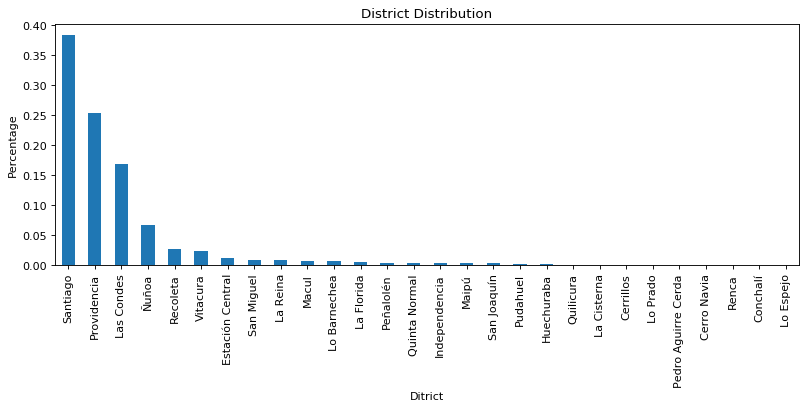

In [121]:
# District distribution (bar plot)
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

(df_listings['neighbourhood_cleansed'].value_counts()/df_listings.shape[0]).plot(kind="bar")
plt.title("District Distribution")
plt.xlabel('Ditrict')
plt.ylabel('Percentage');

In [122]:
df_districts = pd.DataFrame()
df_districts['count'] = df_listings.neighbourhood_cleansed.value_counts()
df_districts['percentage'] = df_listings.neighbourhood_cleansed.value_counts()/df_listings.shape[0]*100
df_districts

,count,percentage
Santiago,3266,38.283906
Providencia,2159,25.307701
Las Condes,1440,16.879616
Ñuñoa,576,6.751846
Recoleta,235,2.754659
Vitacura,206,2.414723
Estación Central,98,1.148752
San Miguel,73,0.855703
La Reina,72,0.843981
Macul,60,0.703317


#### 2. Which neighborhood is the most expensive and which is the cheapest?

In [123]:
# Define variable with districts with the most listings
top_district = ['Santiago', 'Providencia', 'Las Condes', 'Ñuñoa']

In [124]:
# Reformat price column values
df_listings['price'] = df_listings['price'].apply(lambda x: adjusted_price(x))

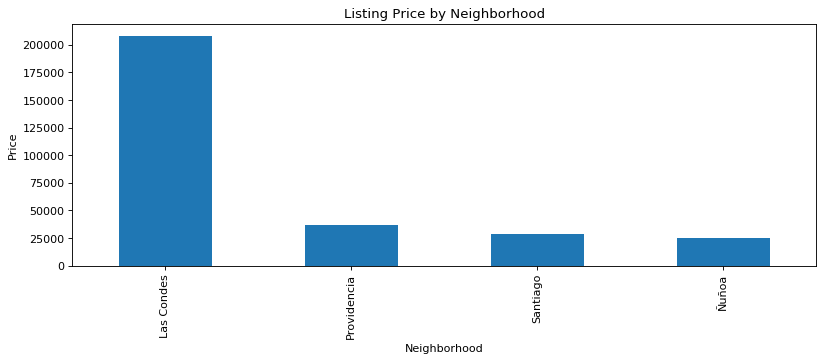

In [125]:
# Plot mean price by neighborhood
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

(df_listings.loc[df_listings['neighbourhood_cleansed'].isin(top_district)].groupby('neighbourhood_cleansed')['price'].mean()).plot(kind="bar")
plt.title("Listing Price by Neighborhood");
plt.xlabel('Neighborhood');
plt.ylabel('Price');

In [126]:
# Calculate mean price by neighborhood
df_listings.loc[df_listings['neighbourhood_cleansed'].isin(top_district)].groupby('neighbourhood_cleansed')['price'].mean()

neighbourhood_cleansed
Las Condes     208394.208333
Providencia     36480.208893
Santiago        28427.278407
Ñuñoa           25114.435764
Name: price, dtype: float64

#### 3. What type of properties are more frequently listed?

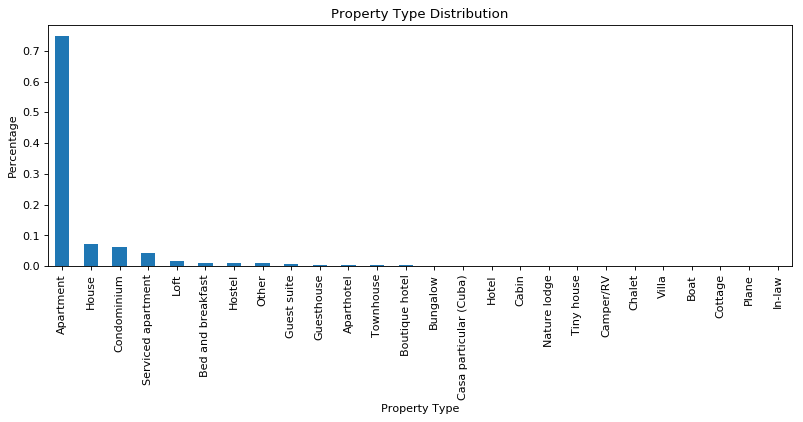

In [127]:
# Property type distribution (bar plot)
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

(df_listings['property_type'].value_counts()/df_listings.shape[0]).plot(kind="bar")
plt.title("Property Type Distribution");
plt.xlabel('Property Type');
plt.ylabel('Percentage');

In [128]:
# Room type distribution (percentage)
df_property = pd.DataFrame()
df_property['count'] = df_listings.property_type.value_counts()
df_property['percentage'] = df_listings.property_type.value_counts()/df_listings.shape[0]*100
df_property

,count,percentage
Apartment,6381,74.797796
House,619,7.255890
Condominium,520,6.095417
Serviced apartment,378,4.430899
Loft,137,1.605908
Bed and breakfast,98,1.148752
Hostel,91,1.066698
Other,77,0.902591
Guest suite,57,0.668151
Guesthouse,41,0.480600


#### 4. How does pricing fluctuate in a monthly basis?

In [129]:
# Calculate average monthly price
avg_price_month = df_calendar.groupby('month').mean()[['price']]
avg_price_month

,price
month,
1,56750.837458
2,58361.602622
3,55581.366753
4,53149.875504
5,53160.956740
6,53329.548294
7,53866.145487
8,54775.310594
9,56130.292571


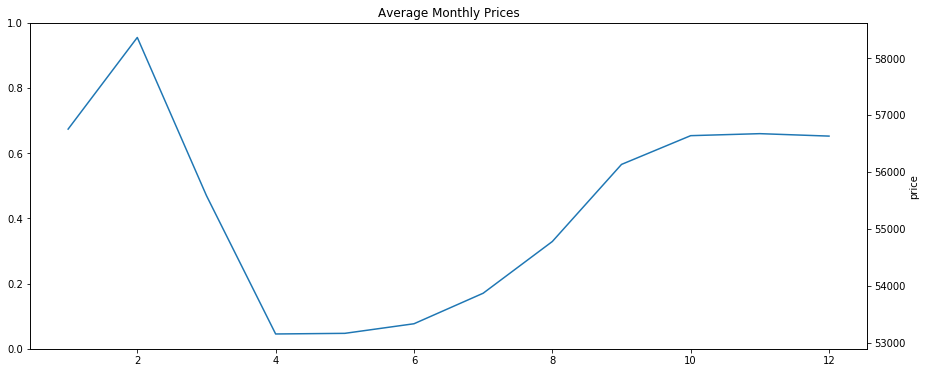

In [130]:
# Plot average monthly price
f, ax = plt.subplots(figsize=(15, 6))
ax = ax.twinx()
plt = sns.lineplot(x = avg_price_month.index, y = 'price',
             data = avg_price_month, ax = ax, linestyle = ':', legend = False)
ax.set_title('Average Monthly Prices');

#### 5. Can we predict the rating of property using a model?

In [131]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(col_features, col_target, test_size = .20, random_state = 42) 

In [132]:
# Instantiate and fit model
model = LinearRegression() 
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
# Predict
train_pred = model.predict(X_train)
test_pred = model.predict(X_test) 

In [134]:
# Score the model
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

print("The rsquared score on the training data is {}.".format(train_score))
print("The rsquared score on the test data is {}.".format(test_score))

The rsquared score on the training data is 0.7759091117149796.
The rsquared score on the test data is 0.7853079026291168.


In [135]:
# Check coefficients
df_coeff = pd.DataFrame()
df_coeff['factor'] = X_train.columns
df_coeff['coefficient'] = model.coef_
df_coeff['abs_coefficient'] = np.abs(model.coef_)
df_coeff = df_coeff.sort_values('abs_coefficient', ascending = False)
df_coeff.head()

,factor,coefficient,abs_coefficient
2,space,1.474579e+07,1.474579e+07
3,description,-5.409685e+06,5.409685e+06
4,neighborhood_overview,-3.201251e+06,3.201251e+06
1,summary,2.461927e+06,2.461927e+06
8,interaction,6.877317e+05,6.877317e+05


<a id='evaluation'></a>
### 5. Evaluation

#### 1. Which are the neighborhoods with the most listings?

There are a total of 28 neighborhoods listed in AirBnB. The neighborhood with the most listings is Santiago with 3,266 listings, 38.28% of the total. The following neighborhood with the most listings is Providencia, which is east adjacent to Santiago, with 2,159 listings and 25.30% of the total.

#### 2. Which neighborhood is the most expensive and which is the cheapest?

Even though Las Condes is a neighborhood that concentrates just 16.87% of the listings, it is the most expensive neighborhood with a mean price of 208,394 chilean pesos. One explanation is that Las Condes is the main finantial district in Santiago, which leads me to believe that a considerable amount of the listings are business related. Santiago, which is the neighborhood with the most listing, is third and far from Las Condes with a mean listing price of 28,427 chilean pesos

#### 3. What type of properties are more frequently listed?

By far the most frequently listed property are Apartments with 6,381 listings with amounts to 74.79% of the total. Houses and Condominiums follow with 7.25 and 6.09 percent of the total.

#### 4. How does pricing fluctuate in a monthly basis?

The most expensive months run from September to March and the least expensive from April to August. This monthly price fluctuation correlates with the warm and cold seasons. There is a peak in February with a mean price of 58,361 chilean pesos. February is one of the most popular months to have vacations.

#### 5. Can we predict the rating of property using a model?

I got an r-squared value of 0.7759 for the training data and 0.7853 for the test data, which indicates that a considerable amount of variability of the data is explained by the variables. The highest coefficients are related to descriptions of the listing (space, description, neighborhood_overview, summary and interaction), which indicates that the amount of information that the host shares with guest affects the overall rating of the listing.